# Part II - Ford Go Bike Presentation
## by Kevin Chiwakaya


## Investigation Overview


> The overall goal of my presentation is to show features that affect bike sharing. To do this the presentation will focus on showing that:
> There was no bike sharing among customers and they took longer on bike rides compared to subscribers
> In both customers and subscribers males took less time on bike rides
> Other gender covered more distance and had more bike sharing compared to other genders



## Dataset Overview

> The Ford Go Bike Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
ford_df['duration_min'] = ford_df.duration_sec/60


In [4]:
def caldistance(start_lat, start_lon, end_lat, end_lon):
    #convert latitudes and longitudes to radius and reassign
    start_lat, start_lon, end_lat, end_lon = np.radians([start_lat, start_lon, end_lat, end_lon])

    a = np.sin((end_lat-start_lat)/2.0)**2 + np.cos(start_lat) * np.cos( end_lat) * np.sin((end_lon-start_lon)/2.0)**2

    earth_radius_est=6371 #earth's estimated radius
    return earth_radius_est * 2 * np.arcsin(np.sqrt(a))# return caluculated distance

#call function and calculate distance and put it into new column
ford_df['dist'] =  caldistance(ford_df.start_station_latitude, ford_df.start_station_longitude,
                 ford_df.end_station_latitude, ford_df.end_station_longitude)

## (Visualization 1)

The following graph is illustrating the relationhip between bike trip duration in minutes by user types and gender

In [5]:
def multivariatebar(data,x,y,hue,title,xlabel,ylabel):
    sb.barplot(data=data, x=x, y=y, hue=hue,palette='viridis_r')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

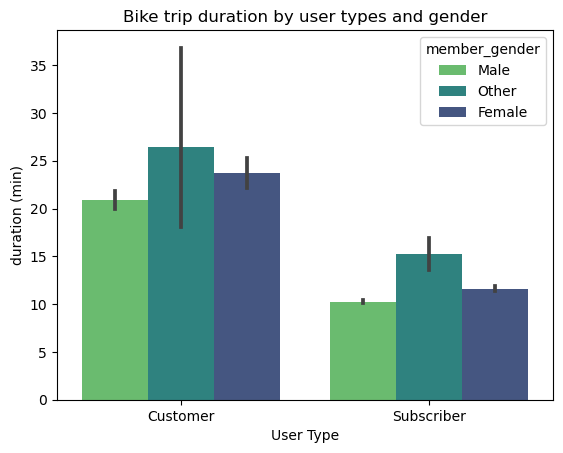

In [6]:
multivariatebar(ford_df,'user_type','duration_min','member_gender','Bike trip duration by user types and gender','User Type','duration (min)')

#### The above plot show that in both types customers and subscribers males took less time on bike rides than females and Other gender

## (Visualization 2)

> The following graph is illustrating the relationhip between bike sharing, duration in minutes and user user types

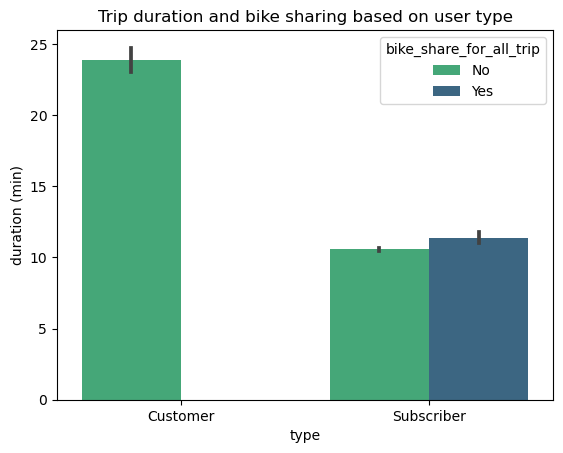

In [7]:
multivariatebar(ford_df,'user_type','duration_min','bike_share_for_all_trip','Trip duration and bike sharing based on user type','type','duration (min)')

#### The above plot show that there was no bike sharing among customers and they took longer on bike rides compared to subscribers than females and Other gender

## (Visualization 3)

> The following graph is illustrating the relationhip between bike sharing, distance covered and gender


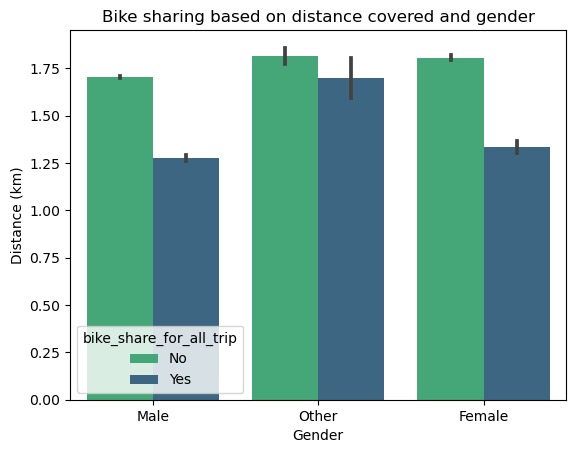

In [8]:
multivariatebar(ford_df,'member_gender','dist','bike_share_for_all_trip','Bike sharing based on distance covered and gender','Gender','Distance (km)') 

#### The above plot indicate that Other gender covered more distance and had a more bike sharing frequency compared to males and females

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt